# Practice Lab: Analyzing NBA games: Best Players

You work at a sports data consulting firm that provides insights to basketball teams, broadcasters, and sports media outlets. In this lab, you will focus on identifying the best players. 

To complete the task you decide to analyze the NBA Boxscore Dataset, which includes 3 tables:

- **game_info**: contains information about each game between two teams, including things like the scores and the outcome.
- **team_stats**: contains detailed statistics for each team in each game, such as points scored, rebounds, assists, and more.
- **player_stats**: contains individual game stats for each player, including points, assists, rebounds, and other performance details.

**The database is extensive, so queries might take a bit longer to complete.**

## Data Schema
The next diagram shows the data schema. For simplicity, it only shows a subset of columns for each table.

<div style="text-align: center">
    <img src="imgsL1/NBA-db-relation.png" width=400>
</div>

For more details on each table, please take a look at the [🔗dataset explorer](https://www.kaggle.com/datasets/lukedip/nba-boxscore-dataset)

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer. If needed, you can copy the code and paste it into the cell

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of Contents
- [Step 1: Import Modules](#import-modules)
- [Step 2: Connect to the Database](#connect-to-the-database)
- [Step 3: Players' Analysis](#players-analysis)
    - [Suspended Players](#suspended-players)
    - [Most Expensive Player](#most-expensive-player)
    - [Performance](#performance)

<a id="import-modules"></a>

## Step 1: Import Modules
Begin by importing sqlite3 and pandas modules

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="connect-to-the-database"></a>

## Step 2: Connect to the Database
Next, you need to establish a connection to the SQLite database to run queries and retrieve the data.

In [2]:
# Connect to the SQLite database
connection = sqlite3.connect("../NBA-Boxscore-Database.db")

# check the connection with a small query
query_first_line = """
SELECT team, MP as 'minutes played' 
FROM team_stats 
LIMIT 1
""" 
pd.read_sql_query(query_first_line, connection)

,team,minutes played
0,ORL,240


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL1/conn_check.png" width="180">
</details>

<a id="players-analysis"></a>

## Step 3: Players' Analysis 
<a id="suspended-players"></a>

### Suspended Players

You want to identify players who get suspended more often, as this should impact how likely they are to get better deals.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQLite query that:
   - Retrieves the player names (`player`) from the `player_stats` table.
   - Where the player was suspended in a game (`MP = "Player Suspended"`).
2. Execute the query using the `pd.read_sql_query()` function.
</div>

In [3]:
### START CODE HERE ###
# write the query
query_suspended = """
SELECT player 
FROM player_stats
WHERE MP = "Player Suspended";
"""

# execute the query
df_suspended = pd.read_sql_query(query_suspended, connection)

### END CODE HERE ###

# show the first rows
df_suspended.head()

,player
0,Jared Sullinger
1,J.R. Smith
2,Hasheem Thabeet
3,Markieff Morris
4,J.R. Smith


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL1/suspended.png" width="130">
</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# write the query
query_suspended = """
SELECT player 
FROM player_stats
WHERE MP = "Player Suspended";
"""

# execute the query
df_suspended = pd.read_sql_query(query_suspended, connection)
```
</details>

Now that you have this data, you can create a column chart showing the number of times each of these players was suspended. You will need to first aggregate the DataFrame resulting from the query. To make the plot easier to read, only show players with more than one suspension.

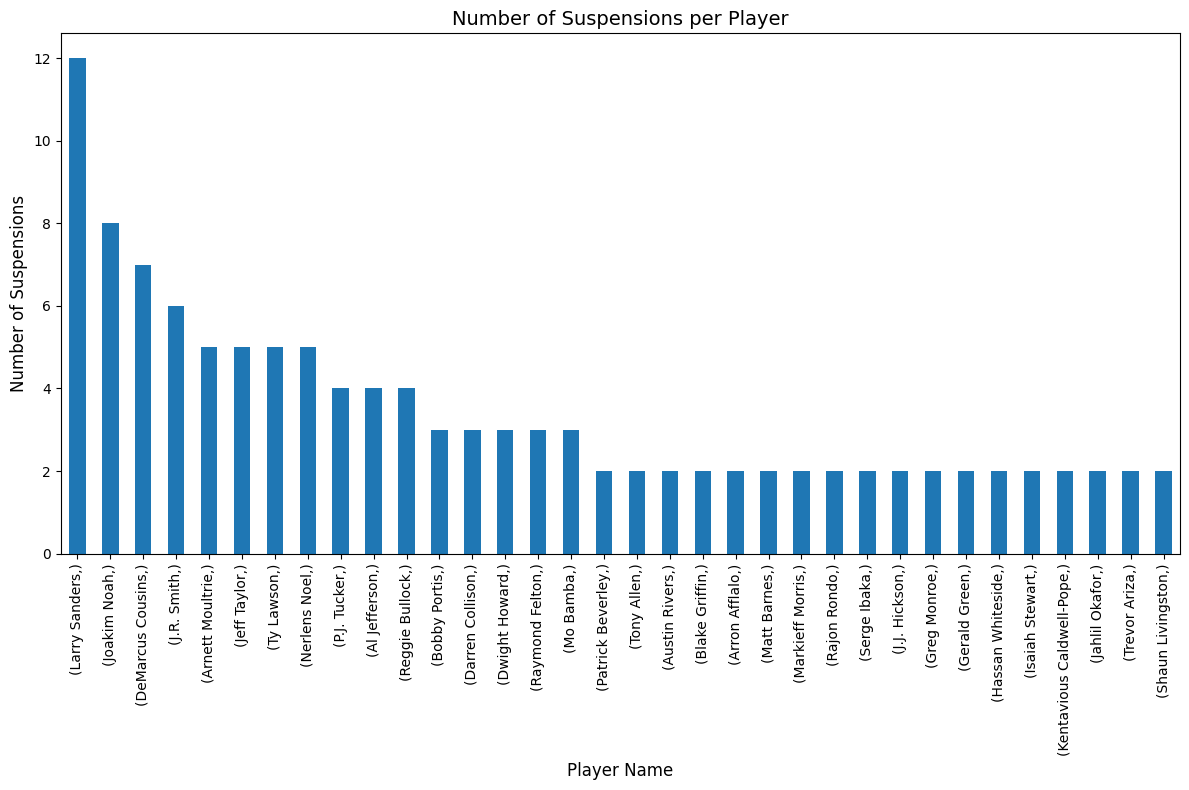

In [4]:
# count the number of suspensions per player
num_suspensions = df_suspended.value_counts()

# create the column chart
plt.figure(figsize=(12, 8))
num_suspensions[num_suspensions>1].plot(kind='bar')

# add the title and labels
plt.title('Number of Suspensions per Player', size=14)
plt.xlabel('Player Name', size=12)
plt.ylabel('Number of Suspensions', size=12)
plt.tight_layout()
plt.show()

<a id="most-expensive-player"></a>

### Most Expensive Player

Currently, the most expensive player is Stephen Curry, from the Golden State Warriors. Is he living up to his standards? You decide to look into his Player Impact Estimate (PIE), which measures a player's overall contribution during a game.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQLite query that:
   - Retrieves the `PIE` from the `player_stats` table.
   - For the player "Stephen Curry".
   - Filter out rows where `PIE` is NULL.
2. Execute the query using the `pd.read_sql_query()` function.
</div>

In [6]:
### START CODE HERE ###

# write the SQL query
query_pie_curry = """
SELECT PIE 
FROM player_stats 
WHERE player = "Stephen Curry" AND PIE IS NOT NULL;
"""

# execute the query
df_pie_curry = pd.read_sql_query(query_pie_curry, connection)

### END CODE HERE ###

# show the first results
df_pie_curry.head()

,PIE
0,5.2
1,15.9
2,12.5
3,21.4
4,3.3


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL1/pie.png" width="50">
</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# write the SQL query
query_pie_curry = """
SELECT PIE 
FROM player_stats 
WHERE player = "Stephen Curry" AND PIE IS NOT NULL;
"""

# execute the query
df_pie_curry = pd.read_sql_query(query_pie_curry, connection)

```
</details>

With this information, now you plot a histogram of the player impact rating of Stephen Curry

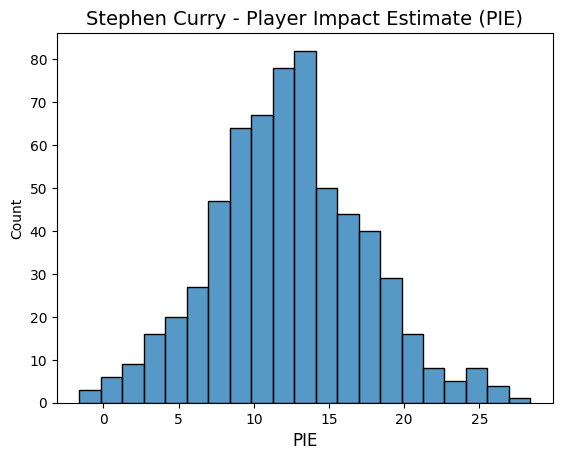

In [7]:
sns.histplot(df_pie_curry['PIE'])
plt.title('Stephen Curry - Player Impact Estimate (PIE)', size=14)
plt.xlabel('PIE', size=12)
plt.show()

Interpret the histogram, what can you say about his PIE? 🥧

<a id="performance"></a>

### Performance

You want to provide coaches and analysts with an intuitive framework for quickly assessing player offensive contributions. You decide to create a scoring performance classification. For now you want to focus on a single game.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Write a SQLite query that:
    - Retrieves the player name (`player`) and `team`.
    - Creates performance bins:
        - "Low Scorer": PTS < 10.
        - "Role Player": PTS BETWEEN 10 AND 20.
        - "Starter": PTS BETWEEN 20 AND 30.
        - "Star Player": PTS > 30.
        - With the alias `scoring_category`.
    - Selects data only from one of the games (game_id = 131410290001).
2. Execute the query using the `pd.read_sql_query()` function.
</div>

In [ ]:
### START CODE HERE ###

# write the SQL query
query_score_category = """
SELECT player, team, 
    CASE 
        WHEN PTS < 10 THEN "Low Scorer"
        WHEN PTS BETWEEN 10 AND 20 THEN "Role Player"
        WHEN PTS BETWEEN 20 AND 30 THEN "Starter"
        ELSE "Star Player"
    END AS scoring_category
FROM None
WHERE None = "131410290001";
"""

# execute the query
df_score_category = pd.read_sql_query(None, connection)

### END CODE HERE ###

# show the first rows
df_score_category.head()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL1/score-cat.png" width="250">
</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# write the SQL query
query_score_category = """
SELECT player, team, 
    CASE 
        WHEN PTS < 10 THEN 'Low Scorer'
        WHEN PTS BETWEEN 10 AND 20 THEN 'Role Player'
        WHEN PTS BETWEEN 20 AND 30 THEN 'Starter'
        ELSE 'Star Player'
    END AS scoring_category
FROM player_stats
WHERE game_id = '131410290001';
"""

# execute the query
df_score_category = pd.read_sql_query(query_score_category, connection)

# show the results
df_score_category.head()
```
</details>

With this data, you can find how many players in each category each team has.

In [ ]:
# create a pivot table. Pivot by team and scoring_category. Aggregate by count.
pivot_df = df_score_category.pivot_table(index='team', columns='scoring_category', aggfunc='count', fill_value=0)

# create the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# add the title and labels
plt.title('Number of Players in Each Scoring Category by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
# add the legend
plt.legend(title='Scoring Category')
# rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

Finally, run the next cell to close the connection.

In [ ]:
connection.close()

Congratulations for making it until the end of this lab. You will keep working on this dataset in Lesson 2. Hope you enjoyed it! 